In [373]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer



In [374]:
ChicagoCensusData=pd.read_csv("C3_ChicagoCensusData.csv", index_col=0)
ChicagoCrimeData=pd.read_csv("C3_ChicagoCrimeData.csv", index_col=0)

In [375]:
# Display columns for each dataset
print("ChicagoCensusData Columns:")
print(ChicagoCensusData.columns)

ChicagoCensusData Columns:
Index(['COMMUNITY_AREA_NAME', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')


In [376]:
print("\nChicagoCrimeData Columns:")
print(ChicagoCrimeData.columns)


ChicagoCrimeData Columns:
Index(['CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE', 'DESCRIPTION',
       'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'DISTRICT',
       'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [377]:
# List of unnecessary variables to be removed
unnecessary_variables_census = ['PERCENT_AGED_UNDER_18_OR_OVER_64']
unnecessary_variables_crime = ['CASE_NUMBER','X_COORDINATE','Y_COORDINATE','LOCATION','WARD','FBICODE','DISTRICT','BEAT','BLOCK','IUCR','ARREST','DOMESTIC']

# Drop unnecessary variables from each dataset
ChicagoCensusData = ChicagoCensusData.drop(columns=unnecessary_variables_census)
ChicagoCrimeData = ChicagoCrimeData.drop(columns=unnecessary_variables_crime)

# Display the columns of the modified datasets
print("Modified ChicagoCensusData Columns:")
print(ChicagoCensusData.columns)

print("\nModified ChicagoCrimeData Columns:")
print(ChicagoCrimeData.columns)

Modified ChicagoCensusData Columns:
Index(['COMMUNITY_AREA_NAME', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

Modified ChicagoCrimeData Columns:
Index(['DATE', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION',
       'COMMUNITY_AREA_NUMBER', 'YEAR', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [378]:
# Merge the datasets on the common column 'COMMUNITY_AREA_NUMBER'
data = pd.merge(ChicagoCrimeData, ChicagoCensusData, on='COMMUNITY_AREA_NUMBER')

# Display the columns of the merged dataset
print("Merged Data Columns:")
print(data.columns)

Merged Data Columns:
Index(['DATE', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION',
       'COMMUNITY_AREA_NUMBER', 'YEAR', 'LATITUDE', 'LONGITUDE',
       'COMMUNITY_AREA_NAME', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')


In [379]:
# Group by 'COMMUNITY_AREA_NUMBER' and create a new column 'CRIME_COUNT'
data['CRIME_COUNT'] = data.groupby('COMMUNITY_AREA_NUMBER')['DATE'].transform('count')

# Reorder the columns in the merged DataFrame
desired_order = [
    'COMMUNITY_AREA_NUMBER','COMMUNITY_AREA_NAME', 'PRIMARY_TYPE', 'DESCRIPTION',
    'LOCATION_DESCRIPTION', 
    'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
    'PERCENT_AGED_16__UNEMPLOYED', 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
    'PER_CAPITA_INCOME', 'HARDSHIP_INDEX','YEAR', 'DATE','CRIME_COUNT', 'LATITUDE', 'LONGITUDE'
]

# Apply the desired order to the columns
data = data[desired_order]


In [380]:
data.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PER_CAPITA_INCOME,HARDSHIP_INDEX,YEAR,DATE,CRIME_COUNT,LATITUDE,LONGITUDE
0,58.0,Brighton Park,THEFT,FROM BUILDING,SMALL RETAIL STORE,14.4,23.6,13.9,45.1,13089,84.0,2004,2004-08-28,10.0,41.807440,-87.703956
1,58.0,Brighton Park,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,14.4,23.6,13.9,45.1,13089,84.0,2011,2011-02-18,10.0,41.828189,-87.698792
2,58.0,Brighton Park,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,14.4,23.6,13.9,45.1,13089,84.0,2011,2011-01-09,10.0,41.821670,-87.689703
3,58.0,Brighton Park,CRIMINAL DAMAGE,TO VEHICLE,STREET,14.4,23.6,13.9,45.1,13089,84.0,2016,2016-11-30,10.0,41.824353,-87.707841
4,58.0,Brighton Park,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,"SCHOOL, PUBLIC, BUILDING",14.4,23.6,13.9,45.1,13089,84.0,2010,2010-05-13,10.0,41.828908,-87.692349


In [381]:
data.tail()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PER_CAPITA_INCOME,HARDSHIP_INDEX,YEAR,DATE,CRIME_COUNT,LATITUDE,LONGITUDE
528,33.0,Near South Side,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),1.3,13.8,4.9,7.4,59077,7.0,2016,2016-06-22,1.0,41.846860,-87.617324
529,20.0,Hermosa,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,6.9,20.5,13.1,41.6,15089,71.0,2004,2004-07-07,3.0,41.924438,-87.730841
530,20.0,Hermosa,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,6.9,20.5,13.1,41.6,15089,71.0,2015,2015-10-09,3.0,41.931581,-87.742957
531,20.0,Hermosa,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,6.9,20.5,13.1,41.6,15089,71.0,2004,2004-10-10,3.0,41.921575,-87.736464
532,12.0,Forest Glen,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,1.1,7.5,6.8,4.9,44164,11.0,2004,2004-04-18,1.0,41.975280,-87.752144


In [382]:
data.keys()

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX', 'YEAR', 'DATE', 'CRIME_COUNT', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [383]:
data.shape

(533, 16)

In [384]:
print(data.isnull().sum())


COMMUNITY_AREA_NUMBER                           43
COMMUNITY_AREA_NAME                              0
PRIMARY_TYPE                                     0
DESCRIPTION                                      0
LOCATION_DESCRIPTION                             0
PERCENT_OF_HOUSING_CROWDED                       0
PERCENT_HOUSEHOLDS_BELOW_POVERTY                 0
PERCENT_AGED_16__UNEMPLOYED                      0
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA     0
PER_CAPITA_INCOME                                0
HARDSHIP_INDEX                                  43
YEAR                                             0
DATE                                             0
CRIME_COUNT                                     43
LATITUDE                                         4
LONGITUDE                                        4
dtype: int64


In [385]:
imputer = SimpleImputer(strategy='mean')

In [386]:
numeric_features = ['COMMUNITY_AREA_NUMBER',
    'PERCENT_OF_HOUSING_CROWDED',
    'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
    'PERCENT_AGED_16__UNEMPLOYED',
    'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
    'PER_CAPITA_INCOME',
    'HARDSHIP_INDEX',
    'CRIME_COUNT',
    'LATITUDE',
    'LONGITUDE','YEAR'
]
# Extract the selected numeric features
df = data[numeric_features]



In [387]:
scaler = StandardScaler()                     # Create scaler
data_scaled = scaler.fit_transform(df)        # Fit scaler
print(data_scaled)                            # Print scaler

# Impute NaN values using mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


[[ 0.95649297  2.26314622 -0.09696047 ... -0.4350615  -0.43551484
  -0.87837313]
 [ 0.95649297  2.26314622 -0.09696047 ... -0.18423151 -0.3494741
   0.5372684 ]
 [ 0.95649297  2.26314622 -0.09696047 ... -0.26303792 -0.19802916
   0.5372684 ]
 ...
 [-0.8202328   0.3093351  -0.4041073  ...  1.06567868 -1.08535141
   1.34620642]
 [-0.8202328   0.3093351  -0.4041073  ...  0.94471445 -0.97717403
  -0.87837313]
 [-1.19428033 -1.20161217 -1.69214238 ...  1.59395985 -1.2384374
  -0.87837313]]


In [388]:
# Create DataFrame DF_scaled with the standardized data
DF_scaled = pd.DataFrame(data=data_scaled, columns=df.columns[:11])

# Print the first 6 rows of DF_scaled
DF_scaled.head(6)


,COMMUNITY_AREA_NUMBER,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PER_CAPITA_INCOME,HARDSHIP_INDEX,CRIME_COUNT,LATITUDE,LONGITUDE,YEAR
0,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.435062,-0.435515,-0.878373
1,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.184232,-0.349474,0.537268
2,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.263038,-0.198029,0.537268
3,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.230608,-0.500245,1.548441
4,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.175541,-0.242123,0.335034
5,0.956493,2.263146,-0.09696,-0.394703,2.042434,-0.69393,0.929109,-0.263473,-0.238884,-0.198613,-0.676139


In [389]:
# Apply PCA on the imputed and standardized data
pca = PCA(n_components=11)
pca_trans = pca.fit_transform(df_imputed)
print(pca_trans)
print(pca_trans.shape)


[[-1.16850523e+04  1.26067982e+01  9.47040450e+00 ... -1.56304224e+00
  -2.40282702e-02 -6.78948941e-03]
 [-1.16850525e+04  1.27056825e+01  9.38037494e+00 ... -1.29121333e+00
  -1.48495101e-02  1.63057822e-02]
 [-1.16850525e+04  1.27057147e+01  9.38037784e+00 ... -1.29113376e+00
  -2.58265043e-02  1.84512389e-02]
 ...
 [-9.68501109e+03 -2.23052360e+01 -2.78367224e+00 ...  5.56495991e+00
   7.98703237e-02  1.14142377e-03]
 [-9.68501076e+03 -2.24606777e+01 -2.64220079e+00 ...  5.13774507e+00
   7.18783167e-02 -9.02284328e-03]
 [ 1.93900638e+04 -1.40490057e+01 -2.35955435e+01 ...  2.31511989e-01
   1.12796758e-01 -1.37996395e-02]]
(533, 11)


In [390]:
prop_var = pca.explained_variance_ratio_     # Extract proportion of explained variance
print(prop_var)                                                   # Print proportion of explained variance

[9.99997049e-01 1.22813569e-06 1.01084111e-06 3.40665745e-07
 2.07764563e-07 8.81023540e-08 4.75896051e-08 2.05843298e-08
 7.46408985e-09 1.22013575e-11 2.98300408e-12]


In [391]:
PC_number = np.arange(pca.n_components_) + 1 # Enumarate component numbers
print(PC_number)                                                         # Print component numbers

[ 1  2  3  4  5  6  7  8  9 10 11]


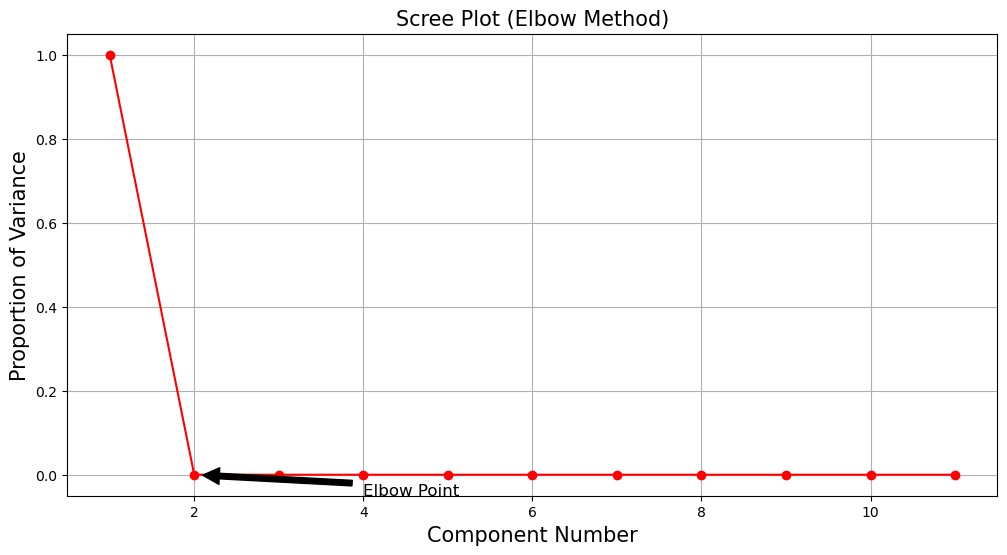

In [392]:

# Assuming PC_number and prop_var are defined in your code
plt.figure(figsize=(12, 6))
plt.plot(PC_number, prop_var, 'ro-')
plt.title('Scree Plot (Elbow Method)', fontsize=15)
plt.xlabel('Component Number', fontsize=15)
plt.ylabel('Proportion of Variance', fontsize=15)
plt.grid()

# Annotate the graph with arrows and text
plt.annotate('Elbow Point', xy=(2, prop_var[2]), xytext=(4, prop_var[2] - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()


In [393]:
var = pca.explained_variance_                # Extract explained variance
print(var)                                                    # Print explained variance


[2.84082255e+08 3.48892586e+02 2.87162870e+02 9.67773784e+01
 5.90223997e+01 2.50283892e+01 1.35194022e+01 5.84766008e+00
 2.12042173e+00 3.46619939e-03 8.47421026e-04]


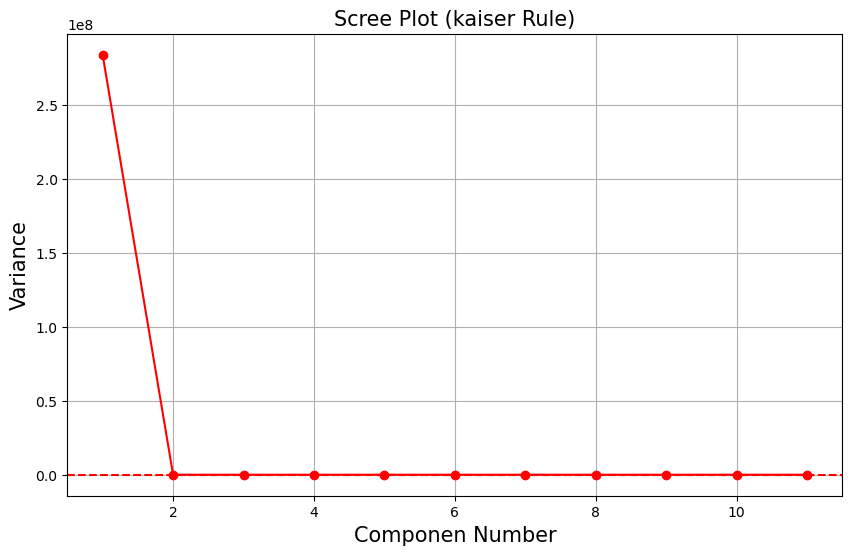

In [394]:
plt.figure(figsize=(10,6))
plt.plot(PC_number,var,'ro-')
plt.title('Scree Plot (kaiser Rule)', fontsize = 15)
plt.xlabel('Componen Number',fontsize = 15 )
plt.ylabel('Variance',fontsize = 15)
plt.axhline(y = 1 ,color = 'r', linestyle = '--')
plt.grid()
plt.show()

In [401]:

# Assuming df_imputed is your DataFrame after imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_imputed)

# Create a DataFrame with the standardized data
DF_scaled = pd.DataFrame(data=data_scaled, columns=df_imputed.columns)

# Apply PCA on the standardized data
pca = PCA(n_components=11)
pca.fit(DF_scaled)

# Extract eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("valeurs propres:", eigenvalues)
print("vecteurs propres:", eigenvectors)

Eigenvalues: [4.61842792 2.44555785 1.22662485 0.9905506  0.70208252 0.44943719
 0.22977941 0.13233229 0.12291511 0.07694711 0.02602184]
Eigenvectors: [[-2.48221525e-01 -2.76637588e-01 -3.71920636e-01 -3.81945004e-01
  -3.65155424e-01  4.14078166e-01 -4.55424452e-01 -1.33822524e-01
   2.05942973e-01  3.14066174e-02 -6.42866996e-02]
 [ 3.97604452e-01 -3.88966384e-01  3.07762291e-02  1.92579127e-01
  -2.50900166e-01  4.02882599e-02 -6.12721328e-02 -2.39041742e-01
  -5.17151917e-01  5.08979345e-01  2.46294617e-02]
 [ 1.78906884e-01  3.49986494e-01 -3.06781665e-01 -3.21358780e-01
   3.46128984e-01 -9.98946993e-02 -1.76190912e-02 -6.88454902e-01
  -8.07685892e-02  2.95924523e-02  1.91445134e-01]
 [-1.97513641e-02 -1.02938864e-01  3.69962276e-02  9.98789206e-02
  -1.09425189e-01  2.31977571e-02 -7.68010350e-02  8.03733305e-02
   5.24029013e-02 -1.24078186e-01  9.66776714e-01]
 [ 5.42975247e-01 -1.86317282e-01 -4.22056200e-01 -1.83725307e-02
  -5.09754400e-02 -1.55298682e-01 -8.71032730e-02  

In [395]:
imputer = SimpleImputer(strategy='mean')
DF_scaled_imputed = pd.DataFrame(imputer.fit_transform(DF_scaled), columns=DF_scaled.columns)

# Perform PCA with 2 components
pca = PCA(n_components=2)
PC = pca.fit_transform(DF_scaled_imputed)

print(PC)
print(PC.shape)


[[-2.14915615 -1.18299606]
 [-2.18830755 -1.23551359]
 [-2.1994652  -1.11649696]
 ...
 [-0.4341341  -1.93100932]
 [-0.30854016 -1.8654968 ]
 [ 3.99401469 -1.05967628]]
(533, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

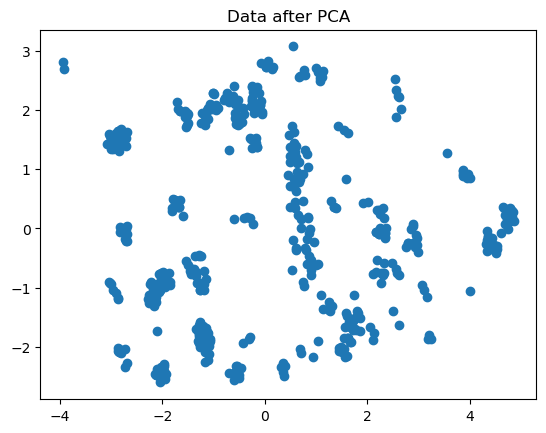

In [396]:
#Biplot Data
PC1 = PC [: , 0] # extract PC1
PC2 = PC [: , 1] # extract PC2

plt.scatter(PC1,PC2)
plt.title('Data after PCA')
plt.show

In [397]:
loadings = pca.components_
print(loadings)
print(loadings.shape)

[[-0.23806296 -0.28227517 -0.37657345 -0.38546952 -0.37101142  0.41955213
  -0.44206739 -0.12902777  0.20508315  0.03304315 -0.0660022 ]
 [ 0.38010227 -0.39666945  0.04133101  0.20425291 -0.25675388  0.03954685
  -0.05497926 -0.21745809 -0.52091224  0.51481026  0.02391016]]
(2, 11)


In [398]:
scalePC1 = 1.0 / (PC1.max() - PC1.min())
print(scalePC1)

scalePC2 = 1.0 / (PC2.max() - PC2.min())
print(scalePC2)

0.11371353759753491
0.17634626176449503


In [399]:
features = df.columns[:11]
print(features)

Index(['COMMUNITY_AREA_NUMBER', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX', 'CRIME_COUNT', 'LATITUDE', 'LONGITUDE', 'YEAR'],
      dtype='object')


Text(0.5, 1.0, 'Simple Biplot')

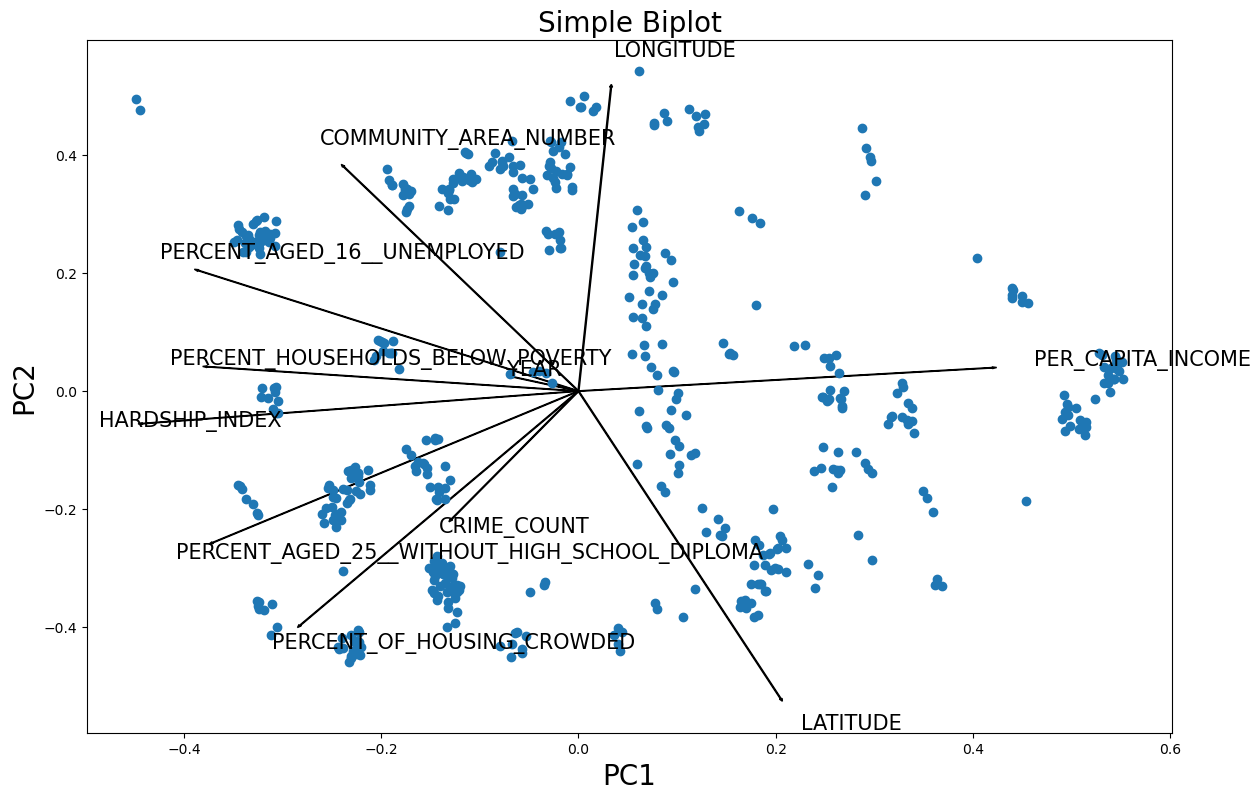

In [400]:
# Biplot
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i])
    ax.text(loadings[0, i] * 1.1, loadings[1, i] * 1.1, feature, fontsize=15)

ax.scatter(PC1 * scalePC1, PC2 * scalePC2)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Simple Biplot', fontsize=20)
